# Введение в искусственные нейронные сети
# Урок 2. Keras

Используем набор примеров fashion-MNIST

1. Опишите - какой результата получен в нейросети в зависимости от:
числа нейронов в слое(для 2-хслойной сети),
числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
фиксируйте для тренировочного и тестового набора метрики accuracy.

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [41]:
import numpy as np

import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist  

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [42]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) 
print(test_images.shape) 

(60000, 784)
(10000, 784)


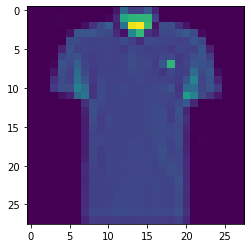

0


In [43]:
plt.imshow(train_imagesi[202,:,:])
plt.show()
print(train_labels[202])

In [44]:
train_images[202,:]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.88188976, -0.36220472, -0.63779528, -0.62992126,
       -0.45669291, -0.79527559, -1.        , -1.        , -1.        ,
       -0.99212598, -0.99212598, -1.        , -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.99212598, -0.98425197, -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -0.97637795, -0.77952756,
        0.22834646,  0.30708661,  0.31496063,  0.31496063, -0.5984252 ,
       -1.        , -1.        , -1.        , -1.        , -0.99212598,
       -1.        , -0.99212598, -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.98425197, -1.        , -1.        , -0.92125984, -0.70866142,
       -0.54330709, -0.4015748 , -0.83464567, -0.2519685 ,  0.94

### 2-слойная модель

Epoch 1/15
80/80 [==============================] - 1s 13ms/step - loss: 1.2222 - accuracy: 0.6764 - val_loss: 0.8420 - val_accuracy: 0.7825
Epoch 2/15
80/80 [==============================] - 1s 11ms/step - loss: 0.7055 - accuracy: 0.8112 - val_loss: 0.6082 - val_accuracy: 0.8303
Epoch 3/15
80/80 [==============================] - 1s 10ms/step - loss: 0.5499 - accuracy: 0.8397 - val_loss: 0.5133 - val_accuracy: 0.8424
Epoch 4/15
80/80 [==============================] - 1s 10ms/step - loss: 0.4748 - accuracy: 0.8547 - val_loss: 0.4615 - val_accuracy: 0.8545
Epoch 5/15
80/80 [==============================] - 1s 11ms/step - loss: 0.4326 - accuracy: 0.8638 - val_loss: 0.4316 - val_accuracy: 0.8575
Epoch 6/15
80/80 [==============================] - 1s 11ms/step - loss: 0.4013 - accuracy: 0.8692 - val_loss: 0.4051 - val_accuracy: 0.8635
Epoch 7/15
80/80 [==============================] - 1s 11ms/step - loss: 0.3791 - accuracy: 0.8742 - val_loss: 0.3904 - val_accuracy: 0.8677
Epoch 8/15
80

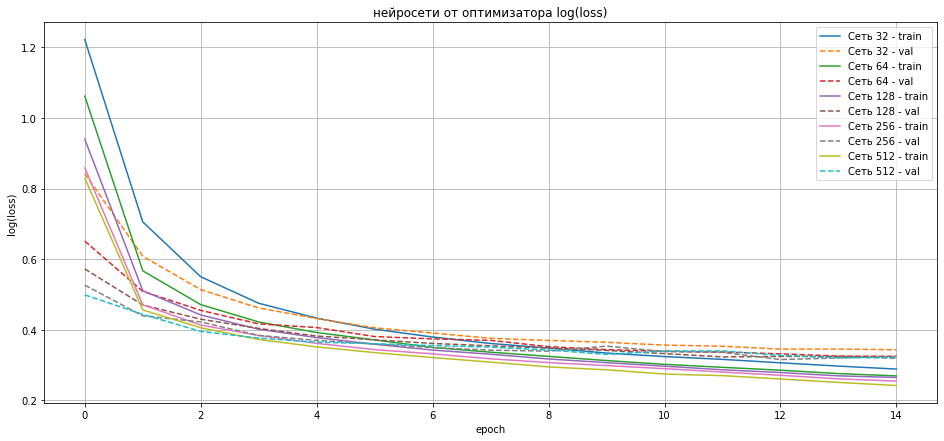

In [45]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

result2 = []

for neuron_num in [32, 64, 128, 256, 512]:
  # Build the model.
  model2 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
#  Dense(110, activation='relu'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
  ])

  # Compile the model.
  model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history2 = model2.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
  )

  # накопление результатов
  model_name = f'Сеть {neuron_num} нейрона'
  model_accuracy = history2.history['accuracy'][epochs-1]
  model_val_accuracy = history2.history['val_accuracy'][epochs-1]
  result2.append([model_name,model_accuracy, model_val_accuracy])

  # картинки
  plt.plot(epoch,history2.history['loss'],'-',label = f'Сеть {neuron_num} - train')
  plt.plot(epoch,history2.history['val_loss'],'--',label = f'Сеть {neuron_num} - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [46]:
# Оценка accuracy
pd.DataFrame(result2, columns=['model_name','model_accuracy','model_val_accuracy']).sort_values('model_val_accuracy',ascending=False).head(5)

,model_name,model_accuracy,model_val_accuracy
1,Сеть 64 нейрона,0.903646,0.885000
4,Сеть 512 нейрона,0.911708,0.884333
2,Сеть 128 нейрона,0.904354,0.883500
3,Сеть 256 нейрона,0.909167,0.882000
0,Сеть 32 нейрона,0.900750,0.879000


*В двухслойной модели увеличение ширины слоя повышает точность обучения на тренировочной выборке. Наилучшая точность на валидационной выборке - при 64 нейронах в скрытом слое.*

In [47]:
result_dense = []

# Build the model.
model2_64 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
#  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model2_64.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history2_64 = model2_64.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores2_64 = model2_64.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'2-слойная сеть'
mod_accuracy = history2_64.history['accuracy'][epochs-1]
mod_val_accuracy = history2_64.history['val_accuracy'][epochs-1]
test_accuracy = test_scores2_64[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 2s 15ms/step - loss: 0.9311 - accuracy: 0.7220 - val_loss: 0.5949 - val_accuracy: 0.8068
Epoch 2/15
80/80 [==============================] - 1s 13ms/step - loss: 0.5285 - accuracy: 0.8267 - val_loss: 0.4795 - val_accuracy: 0.8365
Epoch 3/15
80/80 [==============================] - 1s 13ms/step - loss: 0.4486 - accuracy: 0.8483 - val_loss: 0.4394 - val_accuracy: 0.8455
Epoch 4/15
80/80 [==============================] - 1s 13ms/step - loss: 0.4122 - accuracy: 0.8581 - val_loss: 0.4074 - val_accuracy: 0.8572
Epoch 5/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3886 - accuracy: 0.8643 - val_loss: 0.3917 - val_accuracy: 0.8627
Epoch 6/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3649 - accuracy: 0.8722 - val_loss: 0.3745 - val_accuracy: 0.8663
Epoch 7/15
80/80 [==============================] - 1s 12ms/step - loss: 0.3508 - accuracy: 0.8765 - val_loss: 0.3691 - val_accuracy: 0.8692
Epoch 8/15
80

### 3-слойная модель

In [48]:
# Build the model.
model3 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history3 = model3.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores3 = model3.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'3-слойная сеть'
mod_accuracy = history3.history['accuracy'][epochs-1]
mod_val_accuracy = history3.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 2s 16ms/step - loss: 1.0097 - accuracy: 0.6970 - val_loss: 0.6006 - val_accuracy: 0.8047
Epoch 2/15
80/80 [==============================] - 1s 14ms/step - loss: 0.5220 - accuracy: 0.8278 - val_loss: 0.4824 - val_accuracy: 0.8375
Epoch 3/15
80/80 [==============================] - 1s 14ms/step - loss: 0.4468 - accuracy: 0.8477 - val_loss: 0.4414 - val_accuracy: 0.8467
Epoch 4/15
80/80 [==============================] - 1s 14ms/step - loss: 0.4027 - accuracy: 0.8604 - val_loss: 0.4019 - val_accuracy: 0.8633
Epoch 5/15
80/80 [==============================] - 1s 14ms/step - loss: 0.3730 - accuracy: 0.8710 - val_loss: 0.4000 - val_accuracy: 0.8566
Epoch 6/15
80/80 [==============================] - 1s 14ms/step - loss: 0.3544 - accuracy: 0.8742 - val_loss: 0.3789 - val_accuracy: 0.8655
Epoch 7/15
80/80 [==============================] - 1s 14ms/step - loss: 0.3370 - accuracy: 0.8808 - val_loss: 0.3620 - val_accuracy: 0.8722
Epoch 8/15
80

### 5-слойная модель

In [49]:
# Build the model.
model5 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history5 = model5.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores5 = model5.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'5-слойная сеть'
mod_accuracy = history5.history['accuracy'][epochs-1]
mod_val_accuracy = history5.history['val_accuracy'][epochs-1]
test_accuracy = test_scores5[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 2s 22ms/step - loss: 0.9665 - accuracy: 0.7251 - val_loss: 0.5691 - val_accuracy: 0.8224
Epoch 2/15
80/80 [==============================] - 2s 20ms/step - loss: 0.4907 - accuracy: 0.8406 - val_loss: 0.4469 - val_accuracy: 0.8515
Epoch 3/15
80/80 [==============================] - 2s 20ms/step - loss: 0.4117 - accuracy: 0.8610 - val_loss: 0.4289 - val_accuracy: 0.8533
Epoch 4/15
80/80 [==============================] - 2s 20ms/step - loss: 0.3705 - accuracy: 0.8733 - val_loss: 0.3868 - val_accuracy: 0.8659
Epoch 5/15
80/80 [==============================] - 2s 20ms/step - loss: 0.3368 - accuracy: 0.8827 - val_loss: 0.3766 - val_accuracy: 0.8680
Epoch 6/15
80/80 [==============================] - 2s 20ms/step - loss: 0.3224 - accuracy: 0.8855 - val_loss: 0.3499 - val_accuracy: 0.8758
Epoch 7/15
80/80 [==============================] - 2s 20ms/step - loss: 0.3047 - accuracy: 0.8924 - val_loss: 0.3533 - val_accuracy: 0.8763
Epoch 8/15
80

### 10-слойная модель

In [50]:
# Build the model.
model10 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), 
  Dense(256, activation='tanh'),
  Dense(128, activation='tanh'),
  Dense(60, activation='sigmoid'),
  Dense(60, activation='relu'),
  Dense(64, activation='tanh'),
  Dense(128, activation='tanh'),
  Dense(256, activation='relu'),
  Dense(64, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model10.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history10 = model10.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores10 = model10.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'10-слойная сеть'
mod_accuracy = history10.history['accuracy'][epochs-1]
mod_val_accuracy = history10.history['val_accuracy'][epochs-1]
test_accuracy = test_scores10[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 3s 31ms/step - loss: 1.4772 - accuracy: 0.4906 - val_loss: 0.8655 - val_accuracy: 0.6982
Epoch 2/15
80/80 [==============================] - 2s 28ms/step - loss: 0.7370 - accuracy: 0.7501 - val_loss: 0.6443 - val_accuracy: 0.7900
Epoch 3/15
80/80 [==============================] - 2s 28ms/step - loss: 0.5659 - accuracy: 0.8131 - val_loss: 0.5107 - val_accuracy: 0.8413
Epoch 4/15
80/80 [==============================] - 2s 27ms/step - loss: 0.4791 - accuracy: 0.8464 - val_loss: 0.4674 - val_accuracy: 0.8503
Epoch 5/15
80/80 [==============================] - 2s 27ms/step - loss: 0.4212 - accuracy: 0.8639 - val_loss: 0.4383 - val_accuracy: 0.8557
Epoch 6/15
80/80 [==============================] - 2s 27ms/step - loss: 0.3855 - accuracy: 0.8734 - val_loss: 0.4052 - val_accuracy: 0.8666
Epoch 7/15
80/80 [==============================] - 2s 28ms/step - loss: 0.3561 - accuracy: 0.8799 - val_loss: 0.3775 - val_accuracy: 0.8712
Epoch 8/15
80

Text(0.5, 1.0, 'Потери от эпох')

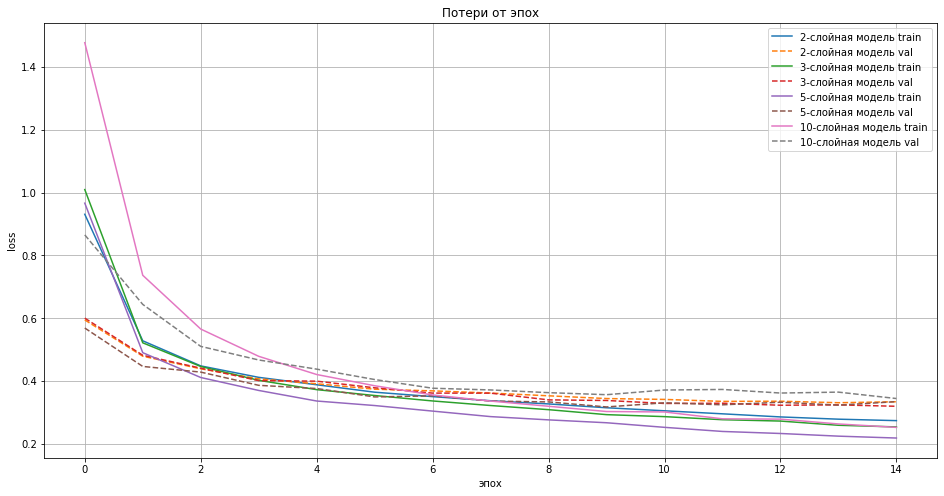

In [51]:
plt.figure(figsize=(16, 8))

plt.plot(history2_64.history['loss'],'-', label='2-слойная модель train')
plt.plot(history2_64.history['val_loss'],'--', label='2-слойная модель val')
plt.plot(history3.history['loss'],'-', label='3-слойная модель train')
plt.plot(history3.history['val_loss'],'--', label='3-слойная модель val')
plt.plot(history5.history['loss'],'-', label='5-слойная модель train')
plt.plot(history5.history['val_loss'],'--', label='5-слойная модель val')
plt.plot(history10.history['loss'],'-', label='10-слойная модель train')
plt.plot(history10.history['val_loss'],'--', label='10-слойная модель val')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох')

Text(0.5, 1.0, 'Accuracy от эпох')

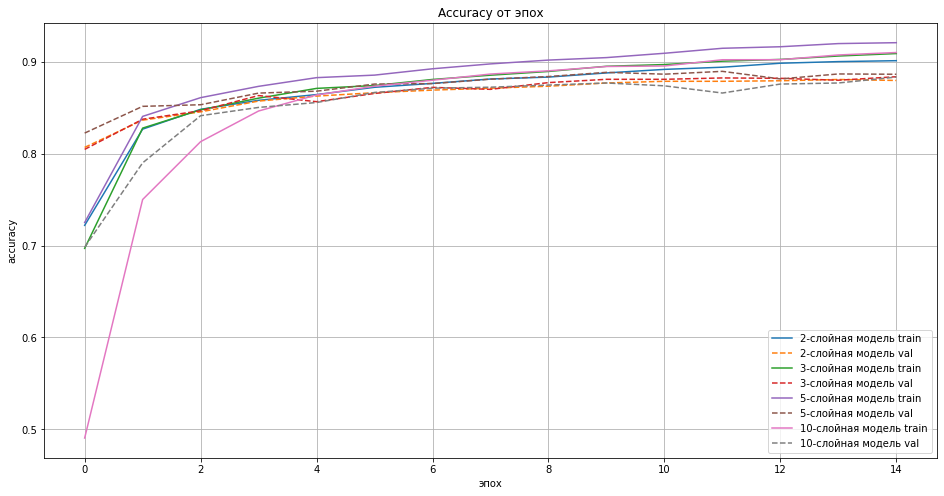

In [52]:
plt.figure(figsize=(16, 8))

plt.plot(history2_64.history['accuracy'],'-', label='2-слойная модель train')
plt.plot(history2_64.history['val_accuracy'],'--', label='2-слойная модель val')
plt.plot(history3.history['accuracy'],'-', label='3-слойная модель train')
plt.plot(history3.history['val_accuracy'],'--', label='3-слойная модель val')
plt.plot(history5.history['accuracy'],'-', label='5-слойная модель train')
plt.plot(history5.history['val_accuracy'],'--', label='5-слойная модель val')
plt.plot(history10.history['accuracy'],'-', label='10-слойная модель train')
plt.plot(history10.history['val_accuracy'],'--', label='10-слойная модель val')
plt.xlabel('эпох')
plt.ylabel('accuracy')
plt.legend()
plt.grid('On')
plt.title('Accuracy от эпох')

In [53]:
# Оценка accuracy
pd.DataFrame(result_dense, columns=['mod_name','mod_accuracy','mod_val_accuracy', 'test_accuracy']).sort_values('mod_val_accuracy',ascending=False).head(5)

,mod_name,mod_accuracy,mod_val_accuracy,test_accuracy
2,5-слойная сеть,0.920771,0.886417,0.8763
1,3-слойная сеть,0.908938,0.883750,0.8794
3,10-слойная сеть,0.910062,0.883333,0.8700
0,2-слойная сеть,0.901187,0.879667,0.8705


***В 5-слойной модели точность выше.***

### Эксперимент с разными оптимизаторами для одной начальной модели:
  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных

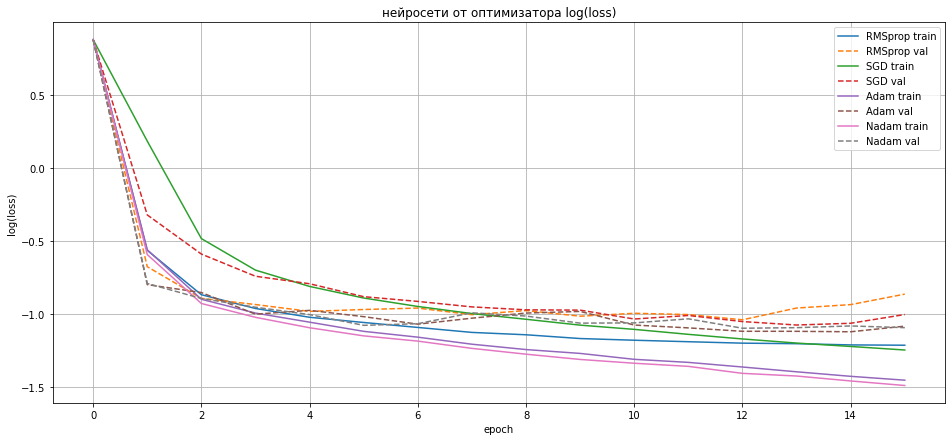

In [54]:
# создаем модель model
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

result=[]

# будем изменять оптимизаторы
for i_optim in [tf.keras.optimizers.RMSprop(),tf.keras.optimizers.SGD( ),tf.keras.optimizers.Adam( ),tf.keras.optimizers.Nadam( )]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='relu'),
                      Dense(256, activation='tanh'),
                      Dense(128, activation='tanh'),
                      Dense(64, activation='sigmoid'),
                      Dense(10, activation='softmax'),
                      ])
  
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  # накопление результатов
  method_name = modeli.optimizer.get_config()['name']
  method_accuracy = hh.history['accuracy'][14]
  method_val_accuracy = hh.history['val_accuracy'][14]
  result.append([method_name,method_accuracy, method_val_accuracy])


  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [55]:
# Оценка accuracy

pd.DataFrame(result, columns=['method_name','method_accuracy','method_val_accuracy']).sort_values('method_val_accuracy',ascending=False).head(4)

,method_name,method_accuracy,method_val_accuracy
3,Nadam,0.918375,0.887000
2,Adam,0.912833,0.884333
1,SGD,0.898729,0.871167
0,RMSprop,0.895021,0.863833


**Вывод**

***Качество классификации в нейросети на тестовом наборе помогла улучшить настройка архитектуры модели:
* подбор ширины скрытого слоя
* подбор количества слоев
* подбор оптимизатора***

In [56]:
 modeli.optimizer.get_config()

{'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.004,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Nadam'}

Посмотрим на результат предсказаний для обученной модели (последняя в цикле)

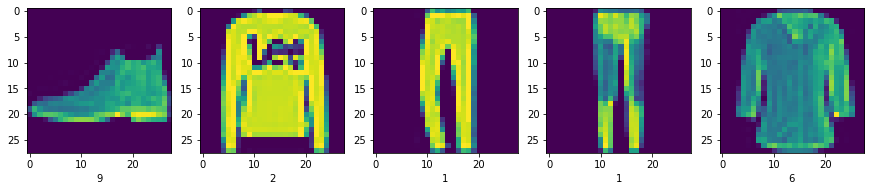

In [57]:
N = 5
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show() 

In [58]:
y_pred_class

array([9, 2, 1, 1, 6])

Оценим предсказания на тестовой выборке.

In [59]:
test_pred = np.argmax(modeli.predict(test_images), axis=1)

In [60]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.82      0.75      0.78      1000
           3       0.87      0.91      0.89      1000
           4       0.77      0.86      0.81      1000
           5       0.96      0.95      0.95      1000
           6       0.70      0.69      0.70      1000
           7       0.95      0.90      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.91      0.98      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [61]:
print(confusion_matrix(test_labels, test_pred))

[[796   2  15  34   3   2 139   0   9   0]
 [  6 960   0  24   6   0   3   0   1   0]
 [ 30   2 754  14 123   1  74   0   2   0]
 [ 15   6   5 910  32   1  27   0   4   0]
 [  0   1  69  25 859   0  45   0   1   0]
 [  0   0   0   0   0 948   0  28   2  22]
 [ 98   2  76  35  84   0 691   0  14   0]
 [  0   0   0   0   0  25   0 901   1  73]
 [  5   0   3   5   5   3   5   4 970   0]
 [  0   0   0   0   0  10   0  11   0 979]]


In [62]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')
